By HARSHA DAS

## Simple Linear Regression- Problem Statement

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Data Preprocessing 


In [18]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [19]:
# Reading data from remote link
url = "http://bit.ly/w-data"
student = pd.read_csv(url)

In [20]:
#Check the dataset
student

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [21]:
# Getting an overview of dataset
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [22]:
# Checking the number of rows and columns 
student.shape

(25, 2)

In [23]:
# Checking if any null value is present
student['Hours'].isnull().sum()

0

In [24]:
student['Scores'].isnull().sum()

0

In [25]:
# Getting statistical info from the numerical Columns 
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


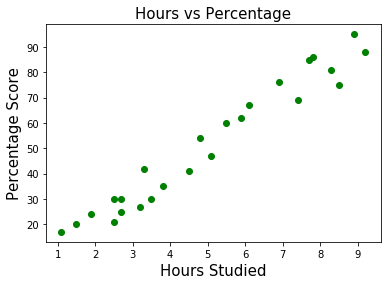

In [48]:
# Plotting the distribution of scores
 
plt.title('Hours vs Percentage', fontsize= 15)  
plt.xlabel('Hours Studied' , fontsize= 15)  
plt.ylabel('Percentage Score' , fontsize= 15)  
plt.scatter(student.Hours, student.Scores, color='green')
plt.show()

##### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

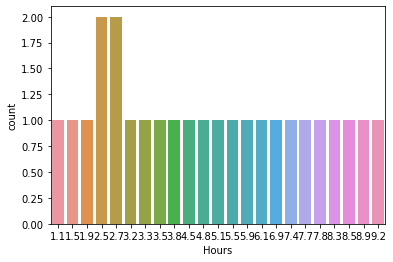

In [30]:
# Visualising the 'Hours' column 
sns.countplot(x='Hours' , data= student)

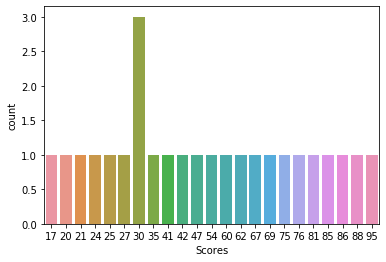

In [31]:
# Visualising the 'Scores' column 
sns.countplot(x='Scores' , data= student)

### Preparing the data

In [16]:
# Splitting the dependent and independent variables
X = student.iloc[:, :-1].values  
y = student.iloc[:, 1].values  

In [32]:
# Splitting test & train data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Training the Algorithm

In [33]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

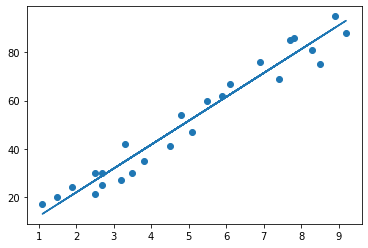

In [34]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making Predictions
After training the algorithm, let's make some predictions

In [35]:
# Testing data (Hours)
print(X_test) 
# Predicting the scores
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [36]:
# Comparing Actual vs Predicted Data
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataset

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [51]:
# Predicting the score

hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


#### From above scores, we can predict that a student studies for 9.25 Hours, he is most likely to score 93.69% 

### Accuracy of the model

In [49]:
from sklearn import metrics  
metrics.r2_score(y_test, y_pred)

0.9454906892105356

#### More than 94% indicates that above fitted model is a Good Model

### Evaluating the model

The final step is to evaluate the performance of algorithm. We have chosen the mean square error

In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


In [43]:
print('Root of Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root of Mean Squared Error: 4.6474476121003665


In [44]:
print('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 21.5987693072174


#### The difference between MAE and RMSE is very less, so error size is also less and hence the Linear Regression Model is working successfully